# Linear Regression from scractch

## 1. Importing necessary libraries

In [16]:
import math
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import pickle

## 2. Importing the data and some EDA

In [3]:
train_data = pd.read_csv(f"../input/random-linear-regression/train.csv")
test_data = pd.read_csv(f"../input/random-linear-regression/test.csv")

In [4]:
train_data = train_data.dropna()
test_data = test_data.dropna()

Let's check the data.

In [5]:
train_data.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


I particularly chose this dataset so it can fit nicely to a linear regression model. This graph will tell you why.

/tmp/ipykernel_33/2620691747.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


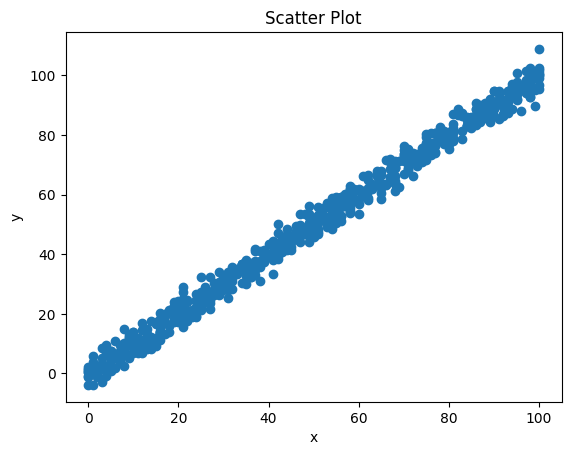

In [7]:
plt.scatter(train_data['x'], train_data['y'])
plt.style.use('seaborn')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter Plot')
plt.show()

See! The data itself is veryy linear. Now that we know how the data is distributed let's move on to making it easy for the model to process.

## 3. Data preprocessing

Let's separate the data first so that we can standardize the features (Here it is the x column).

In [8]:
X_train = train_data['x'].values
y_train = train_data['y'].values

X_test = test_data['x'].values
y_test = test_data['y'].values

### The Steps to Standardize the data

1. Calculate mean($\mu$) and standard deviation($\sigma$) for each feature in the dataset.
2. Now for each data point, subtract mean($\mu$) of the feature and divide by the standard deviation($\sigma$) of the feature.

Let the feature be denoted as $x$ then the formula for standardized value can be written as:
$$
\text{Standardized Value} = \frac{x - \mu}{\sigma}
$$

In [11]:
def standardize_data(X_train, X_test):
    """
    Standardizes the input data using mean and standard deviation.

    Parameters:
        X_train (numpy.ndarray): Training data.
        X_test (numpy.ndarray): Testing data.

    Returns:
        Tuple of standardized training and testing data.
    """
    mean = np.mean(X_train, axis=0)
    std = np.std(X_train, axis=0)
    
    X_train = (X_train - mean) / std
    X_test = (X_test - mean) / std
    
    return X_train, X_test

X_train, X_test = standardize_data(X_train, X_test)

In [12]:
# Reshaping the data for the correct shape of the model
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

# 4. Implementation of the model

# Linear Regression: Understanding and Training

Linear regression is a fundamental model in machine learning used for predicting a continuous output variable based on input features.
The model function for linear regression is represented as:
$$f_{w,b}(x) = wx + b$$
In this equation, $f_{w,b}(x)$ represents the predicted output, $w$ is the weight parameter, $b$ is the bias parameter, and $x$ is the input feature.

## Model Training

To train a linear regression model, we aim to find the best values for the parameters $(w, b)$ that best fit our dataset.

### Forward Pass

The forward pass is a step where we compute the linear regression output for the input data $X$ using the current weights and biases. 
It's essentially applying our model to the input data.

### Cost Function

 The cost function is used to measure how well our model is performing. It quantifies the difference between the predicted values and the actual values in our dataset. 
 The cost function is defined as:
$$J(w,b) = \frac{1}{2m} \sum_{i=1}^{m}(f_{w,b}(x^{(i)}) - y^{(i)})^2$$
 Here, $J(w, b)$ is the cost, m is the number of training examples, $x^{(i)}$ is the input data for the i-th example, $y^{(i)}$ is the actual output for the $i$-th example, and $w$ and $b$ are the weight and bias parameters, respectively.

### Backward Pass (Gradient Computation)

 The backward pass computes the gradients of the cost function with respect to the weights and biases. 
 These gradients are crucial for updating the model parameters during training. The gradient formulas are as follows:
$$
 \frac{\partial J(w,b)}{\partial b} = \frac{1}{m} \sum_{i=0}^{m-1} (f_{w,b}(X^{(i)}) - y^{(i)})
$$

$$
\frac{\partial J(w,b)}{\partial w} = \frac{1}{m} \sum_{i=0}^{m-1} (f_{w,b}(X^{(i)}) - y^{(i)})X^{(i)}
$$
## Training Process

 The training process involves iteratively updating the weights and biases to minimize the cost function. 
 This is typically done through an optimization algorithm like gradient descent. 
 The update equations for parameters are:
 $$w \leftarrow w - \alpha \frac{\partial J}{\partial w}$$
 $$b \leftarrow b - \alpha \frac{\partial J}{\partial b}$$
 Here, $\alpha$ represents the learning rate, which controls the step size during parameter updates.

 By iteratively performing the forward pass, computing the cost, performing the backward pass, and updating the parameters, the model learns to make better predictions and fit the data.


In [17]:
class LinearRegression:
    """
    Linear Regression Model with Gradient Descent

    Linear regression is a supervised machine learning algorithm used for modeling the relationship
    between a dependent variable (target) and one or more independent variables (features) by fitting
    a linear equation to the observed data.

    This class implements a linear regression model using gradient descent optimization for training.
    It provides methods for model initialization, training, prediction, and model persistence.

    Parameters:
        learning_rate (float): The learning rate used in gradient descent.
        convergence_tol (float, optional): The tolerance for convergence (stopping criterion). Defaults to 1e-6.

    Attributes:
        W (numpy.ndarray): Coefficients (weights) for the linear regression model.
        b (float): Intercept (bias) for the linear regression model.

    Methods:
        initialize_parameters(n_features): Initialize model parameters.
        forward(X): Compute the forward pass of the linear regression model.
        compute_cost(predictions): Compute the mean squared error cost.
        backward(predictions): Compute gradients for model parameters.
        fit(X, y, iterations, plot_cost=True): Fit the linear regression model to training data.
        predict(X): Predict target values for new input data.
        save_model(filename=None): Save the trained model to a file using pickle.
        load_model(filename): Load a trained model from a file using pickle.

    Examples:
        >>> from linear_regression import LinearRegression
        >>> model = LinearRegression(learning_rate=0.01)
        >>> model.fit(X_train, y_train, iterations=1000)
        >>> predictions = model.predict(X_test)
    """

    def __init__(self, learning_rate, convergence_tol=1e-6):
        self.learning_rate = learning_rate
        self.convergence_tol = convergence_tol
        self.W = None
        self.b = None

    def initialize_parameters(self, n_features):
        """
        Initialize model parameters.

        Parameters:
            n_features (int): The number of features in the input data.
        """
        self.W = np.random.randn(n_features) * 0.01
        self.b = 0

    def forward(self, X):
        """
        Compute the forward pass of the linear regression model.

        Parameters:
            X (numpy.ndarray): Input data of shape (m, n_features).

        Returns:
            numpy.ndarray: Predictions of shape (m,).
        """
        return np.dot(X, self.W) + self.b

    def compute_cost(self, predictions):
        """
        Compute the mean squared error cost.

        Parameters:
            predictions (numpy.ndarray): Predictions of shape (m,).

        Returns:
            float: Mean squared error cost.
        """
        m = len(predictions)
        cost = np.sum(np.square(predictions - self.y)) / (2 * m)
        return cost

    def backward(self, predictions):
        """
        Compute gradients for model parameters.

        Parameters:
            predictions (numpy.ndarray): Predictions of shape (m,).

        Updates:
            numpy.ndarray: Gradient of W.
            float: Gradient of b.
        """
        m = len(predictions)
        self.dW = np.dot(predictions - self.y, self.X) / m
        self.db = np.sum(predictions - self.y) / m

    def fit(self, X, y, iterations, plot_cost=True):
        """
        Fit the linear regression model to the training data.

        Parameters:
            X (numpy.ndarray): Training input data of shape (m, n_features).
            y (numpy.ndarray): Training labels of shape (m,).
            iterations (int): The number of iterations for gradient descent.
            plot_cost (bool, optional): Whether to plot the cost during training. Defaults to True.

        Raises:
            AssertionError: If input data and labels are not NumPy arrays or have mismatched shapes.

        Plots:
            Plotly line chart showing cost vs. iteration (if plot_cost is True).
        """
        assert isinstance(X, np.ndarray), "X must be a NumPy array"
        assert isinstance(y, np.ndarray), "y must be a NumPy array"
        assert X.shape[0] == y.shape[0], "X and y must have the same number of samples"
        assert iterations > 0, "Iterations must be greater than 0"

        self.X = X
        self.y = y
        self.initialize_parameters(X.shape[1])
        costs = []

        for i in range(iterations):
            predictions = self.forward(X)
            cost = self.compute_cost(predictions)
            self.backward(predictions)
            self.W -= self.learning_rate * self.dW
            self.b -= self.learning_rate * self.db
            costs.append(cost)

            if i % 100 == 0:
                print(f'Iteration: {i}, Cost: {cost}')

            if i > 0 and abs(costs[-1] - costs[-2]) < self.convergence_tol:
                print(f'Converged after {i} iterations.')
                break

        if plot_cost:
            fig = px.line(y=costs, title="Cost vs Iteration", template="plotly_dark")
            fig.update_layout(
                title_font_color="#41BEE9",
                xaxis=dict(color="#41BEE9", title="Iterations"),
                yaxis=dict(color="#41BEE9", title="Cost")
            )

            fig.show()

    def predict(self, X):
        """
        Predict target values for new input data.

        Parameters:
            X (numpy.ndarray): Input data of shape (m, n_features).

        Returns:
            numpy.ndarray: Predicted target values of shape (m,).
        """
        return self.forward(X)
    

    def save_model(self, filename=None):
        """
        Save the trained model to a file using pickle.

        Parameters:
            filename (str): The name of the file to save the model to.
        """
        model_data = {
            'learning_rate': self.learning_rate,
            'convergence_tol': self.convergence_tol,
            'W': self.W,
            'b': self.b
        }

        with open(filename, 'wb') as file:
            pickle.dump(model_data, file)

    @classmethod
    def load_model(cls, filename):
        """
        Load a trained model from a file using pickle.

        Parameters:
            filename (str): The name of the file to load the model from.

        Returns:
            LinearRegression: An instance of the LinearRegression class with loaded parameters.
        """
        with open(filename, 'rb') as file:
            model_data = pickle.load(file)

        # Create a new instance of the class and initialize it with the loaded parameters
        loaded_model = cls(model_data['learning_rate'], model_data['convergence_tol'])
        loaded_model.W = model_data['W']
        loaded_model.b = model_data['b']

        return loaded_model

In [18]:
lr = LinearRegression(0.01)
lr.fit(X_train, y_train, 10000)

Iteration: 0, Cost: 1669.7877096811171
Iteration: 100, Cost: 227.1244313150931
Iteration: 200, Cost: 33.83687435009185
Iteration: 300, Cost: 7.940270313831098
Iteration: 400, Cost: 4.470651725127506
Iteration: 500, Cost: 4.005793354731855
Iteration: 600, Cost: 3.943511781411239
Iteration: 700, Cost: 3.935167316468101
Iteration: 800, Cost: 3.934049327768157
Converged after 863 iterations.


In [19]:
lr.save_model('model.pkl')

## 5. Evaluation

In [20]:
model = LinearRegression.load_model("model.pkl")

### 1. Mean Squared Error (MSE)

**Formula:**
$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_{\text{true}_i} - y_{\text{pred}_i})^2
$$

**Description:**
- **Mean Squared Error (MSE)** is a widely used metric for evaluating the accuracy of regression models.
- It measures the average squared difference between the predicted values ($y_{\text{pred}}$) and the actual target values ($y_{\text{true}}$).
- The squared differences are averaged across all data points in the dataset.

**Interpretation:**
- A lower MSE indicates a better fit of the model to the data, as it means the model's predictions are closer to the actual values.
- MSE is sensitive to outliers because the squared differences magnify the impact of large errors.

### 2. Root Mean Squared Error (RMSE)

**Formula:**
$$
\text{RMSE} = \sqrt{\text{MSE}}
$$

**Description:**
- **Root Mean Squared Error (RMSE)** is a variant of MSE that provides the square root of the average squared difference between predicted and actual values.
- It is often preferred because it is in the same unit as the target variable, making it more interpretable.

**Interpretation:**
- Like MSE, a lower RMSE indicates a better fit of the model to the data.
- RMSE is also sensitive to outliers due to the square root operation.

### 3. R-squared ($R^2$)

**Formula:**
$$
R^2 = 1 - \frac{\text{SSR}}{\text{SST}}
$$

**Description:**
- **R-squared ($R^2$)**, also known as the coefficient of determination, measures the proportion of the variance in the dependent variable ($y_{\text{true}}$) that is predictable from the independent variable(s) ($y_{\text{pred}}$) in a regression model.
- It ranges from 0 to 1, where 0 indicates that the model does not explain any variance, and 1 indicates a perfect fit.

**Interpretation:**
- A higher $R^2$ value suggests that the model explains a larger proportion of the variance in the target variable.
- However, $R^2$ does not provide information about the goodness of individual predictions or whether the model is overfitting or underfitting.


In [21]:
class RegressionMetrics:
    @staticmethod
    def mean_squared_error(y_true, y_pred):
        """
        Calculate the Mean Squared Error (MSE).

        Args:
            y_true (numpy.ndarray): The true target values.
            y_pred (numpy.ndarray): The predicted target values.

        Returns:
            float: The Mean Squared Error.
        """
        assert len(y_true) == len(y_pred), "Input arrays must have the same length."
        mse = np.mean((y_true - y_pred) ** 2)
        return mse

    @staticmethod
    def root_mean_squared_error(y_true, y_pred):
        """
        Calculate the Root Mean Squared Error (RMSE).

        Args:
            y_true (numpy.ndarray): The true target values.
            y_pred (numpy.ndarray): The predicted target values.

        Returns:
            float: The Root Mean Squared Error.
        """
        assert len(y_true) == len(y_pred), "Input arrays must have the same length."
        mse = RegressionMetrics.mean_squared_error(y_true, y_pred)
        rmse = np.sqrt(mse)
        return rmse

    @staticmethod
    def r_squared(y_true, y_pred):
        """
        Calculate the R-squared (R^2) coefficient of determination.

        Args:
            y_true (numpy.ndarray): The true target values.
            y_pred (numpy.ndarray): The predicted target values.

        Returns:
            float: The R-squared (R^2) value.
        """
        assert len(y_true) == len(y_pred), "Input arrays must have the same length."
        mean_y = np.mean(y_true)
        ss_total = np.sum((y_true - mean_y) ** 2)
        ss_residual = np.sum((y_true - y_pred) ** 2)
        r2 = 1 - (ss_residual / ss_total)
        return r2


In [22]:
y_pred = model.predict(X_test)
mse_value = RegressionMetrics.mean_squared_error(y_test, y_pred)
rmse_value = RegressionMetrics.root_mean_squared_error(y_test, y_pred)
r_squared_value = RegressionMetrics.r_squared(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse_value}")
print(f"Root Mean Squared Error (RMSE): {rmse_value}")
print(f"R-squared (Coefficient of Determination): {r_squared_value}")

Mean Squared Error (MSE): 9.442668573435663
Root Mean Squared Error (RMSE): 3.0728925417976565
R-squared (Coefficient of Determination): 0.9887898737453887
